# End-to-End Project : Automated Salary Estimator for Data Scientists

<img src="images/datascience.webp" height=400px width=400px>

### Learning Agenda of this Notebook:

- **Project Overview/Planning**
- **Data Collection**
- **Data Cleaning**
- **EDA**
- **Model Building**
- **Productionization**
- **Documentation**


### Project Overview/Planning

- In this project, we are creating a tool that estimates data science salaries `(MAE ~ $ 11K)` to help data scientists negotiate their income when they get a job.

- We will scraped over 1000 job descriptions from `glassdoor` using `python` and `selenium`
- After that, we will engineere the features from the text of each job description to quantify the value companies put on python, excel, aws, and spark.
- To optimized Linear, Lasso, and Random Forest Regressors using GridsearchCV to reach the best model.
- At the end, we will built a client facing API using flask.



In [237]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix

## Data Collection

In [238]:
## We can automatically use the correct chromedriver by using the webdrive-manager. 



#Initializing the webdriver
options = webdriver.ChromeOptions()


driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

driver.set_window_size(1120, 1000)



In [239]:
keyword = 'data scientist'

url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
#url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
driver.get(url)
jobs = []
verbose = False

In [37]:
driver.title

'Data scientist Jobs | Glassdoor'

'<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" style="height: 100%;" lang="en"><head><link href="/jobSearch/static/css/gd-jobSearch.10ace.css" rel="stylesheet" media="all"><meta charset="utf-8"><meta name="referrer" content="origin"><meta name="theme-color" content="#0caa41"><meta name="msapplication-navbutton-color" content="#0caa41"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-status-bar-style" content="#0caa41"><meta http-equiv="Cache-Control" content="no-cache,must-revalidate"><meta http-equiv="Pragma" content="no-cache"><meta http-equiv="Expires" content="0"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="manifest" href="/manifest.json"><link rel="shortcut icon" href="/favicon.ico" type="image/vnd.microsoft.icon"><link rel="icon" href="/favicon.ico" type="image/x-icon"><link rel="preconnect" href="https://fonts.gstatic.com" crossorigin="true"><link rel="preconn
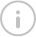

In [38]:
driver.page_source

In [240]:
num_jobs = 1000

slp_time = 10

while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
    time.sleep(slp_time)



#     # Wait for the login overlay to be present
#     wait = WebDriverWait(driver, 10)
#     overlay = wait.until(EC.presence_of_element_located((By.ID, "login-overlay")))

#     # Hide the login overlay
#     driver.execute_script("arguments[0].style.visibility='hidden'", overlay)

#     time.sleep(2)
#     login = driver.find_element('username')

#     login.send_keys('myusername@somewebsite.com')
#     login.send_keys(Keys.RETURN)
    
#     time.sleep(5)
    
    
#         Test for the "Sign Up" prompt and get rid of it.
    try:
        driver.find_element(By.CLASS_NAME, "selected").click()
    except ElementClickInterceptedException:
        pass

    time.sleep(10)

    try:
        driver.find_element(By.CSS_SELECTOR,'[alt="Close"]').click() #clicking to the X.
        print(' x out worked')
    except NoSuchElementException:
        print(' x out failed')
        pass
 #Going through each job in this page
#     job_buttons = driver.find_elements(By.CLASS_NAME,"jl")  #jl for Job Listing. These are the buttons we're going to click.
    job_buttons = driver.find_elements(By.XPATH,"//*[@id='MainCol']/div[1]/ul/li")
    
    for job_button in job_buttons:  

        print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
        if len(jobs) >= num_jobs:
            break

        job_button.click()  #You might 
        time.sleep(1)
        collected_successfully = False
            
        while not collected_successfully:
            try:
                company_name = driver.find_element(By.XPATH,'.//div[@class="employerName"]').text
                location = driver.find_element(By.XPATH,'.//div[@class="location"]').text
                job_title = driver.find_element(By.XPATH, './/div[contains(@class, "title")]').text
                job_description = driver.find_element(By.XPATH,'.//div[@class="jobDescriptionContent desc"]').text
                collected_successfully = True
            except:
                time.sleep(5)

        try:
            salary_estimate = driver.find_element(By.XPATH, './/span[@class="gray salary"]').text
        except NoSuchElementException:
            salary_estimate = -1 #You need to set a "not found value. It's important."
            
        try:
            rating = driver.find_element(By.XPATH, './/span[@class="rating"]').text
        except NoSuchElementException:
            rating = -1 #You need to set a "not found value. It's important."


            
            
 #Printing for debugging
        if verbose:
            print("Job Title: {}".format(job_title))
            print("Salary Estimate: {}".format(salary_estimate))
            print("Job Description: {}".format(job_description[:500]))
            print("Rating: {}".format(rating))
            print("Company Name: {}".format(company_name))
            print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
        try:
            driver.find_element(By.XPATH, './/div[@class="tab" and @data-tab-type="overview"]').click()

            try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                headquarters = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
            except NoSuchElementException:
                headquarters = -1

            try:
                size = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
            except NoSuchElementException:
                size = -1

            try:
                founded = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
            except NoSuchElementException:
                founded = -1

            try:
                type_of_ownership = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
            except NoSuchElementException:
                type_of_ownership = -1

            try:
                industry = driver.find_element(By.XPATH,'.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
            except NoSuchElementException:
                industry = -1

            try:
                sector = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
            except NoSuchElementException:
                sector = -1

            try:
                revenue = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
            except NoSuchElementException:
                revenue = -1

            try:
                competitors = driver.find_element(By.XPATH, './/div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
            except NoSuchElementException:
                competitors = -1

        except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
            headquarters = -1
            size = -1
            founded = -1
            type_of_ownership = -1
            industry = -1
            sector = -1
            revenue = -1
            competitors = -1

                
        if verbose:
            print("Headquarters: {}".format(headquarters))
            print("Size: {}".format(size))
            print("Founded: {}".format(founded))
            print("Type of Ownership: {}".format(type_of_ownership))
            print("Industry: {}".format(industry))
            print("Sector: {}".format(sector))
            print("Revenue: {}".format(revenue))
            print("Competitors: {}".format(competitors))
            print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

        jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs
            
            
        #Clicking on the "next page" button
    try:
        driver.find_element(By.XPATH, './/li[@class="next"]//a').click()
    except NoSuchElementException:
        print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
        break

df_jobs= pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.
# df_jobs.to_csv('datasets/glassdoor_jobs.csv', index=False)
df_jobs.head()



 x out failed
Progress: 0/1000


KeyboardInterrupt: 

In [67]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

def get_jobs(keyword, num_jobs, verbose):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    # Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    # Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    # Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
    driver.set_window_size(1120, 1000)

    url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    
    # Define a global variable so even if error happens the progress can still be saved
    global jobs
    jobs = []

    # Let the page load. Change this number based on your internet speed.
    # Maybe add extra sleeping at the steps you need for more loading time. 
    time.sleep(5)

    # Click on the first job & Test for the "Sign Up" prompt and get rid of it.
    driver.find_element(By.XPATH, "//*[@id='MainCol']/div[1]/ul/li[1]").click()

    time.sleep(1)
    
    # Clicking on the Close X button to close the "Sign Up" prompt.
#     driver.find_element(By.XPATH, '//*[@id="JAModal"]/div/div[2]/span').click()  
    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click() #clicking to the X.

    
    time.sleep(5)
    
    # Clicking on the "Search" button to search for the job postings based on keywords entered. 
    driver.find_element(By.XPATH,'//*[@id="scBar"]/div/button/span').click()
    time.sleep(10)

    while len(jobs) < num_jobs:
        
        # Going through each job in this page
        job_buttons = driver.find_elements(By.XPATH,"//*[@id='MainCol']/div[1]/ul/li")
        
        for job_button in job_buttons:  
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                # When the number of jobs collected has reached the number we set. 
                break
            job_button.click()  
            time.sleep(5)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    time.sleep(5)
                    company_name = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[1]/div/div/div[1]/div[3]/div[1]/div[1]').text
                    location = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[1]/div/div/div[1]/div[3]/div[1]/div[3]').text
                    job_title = driver.find_element(By.XPATH,'//*[@id="JDCol"]/div/article/div/div[1]/div/div/div[1]/div[3]/div[1]/div[2]').text
                    job_description = driver.find_element(By.XPATH, '//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)
                    collected_successfully = True
            try:
                salary_estimate = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[1]/div/div/div[1]/div[3]/div[1]/div[4]/span').text
            except NoSuchElementException:
                # You need to set a "not found value. It's important."
                salary_estimate = -1 
            
            try:
                rating = driver.find_element(By.XPATH, '//*[@id="JDCol"]/div/article/div/div[1]/div/div/div[1]/div[3]/div[1]/div[1]/span').text
            except NoSuchElementException:
                # You need to set a "not found value. It's important."
                rating = -1 

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            time.sleep(5)

            try:
                driver.find_element(By.XPATH, '//div[@data-item="tab" and @data-tab-type="overview"]').click()
                time.sleep(5)

                try:
                    size = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[1]/span[2]').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[2]/span[2]').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[3]/span[2]').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[4]/span[2]').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[5]/span[2]').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element(By.XPATH, '//*[@id="EmpBasicInfo"]/div[1]/div/div[6]/span[2]').text
                except NoSuchElementException:
                    revenue = -1
            # Rarely, some job postings do not have the "Company" tab.
            except NoSuchElementException:  
                
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                             
            if verbose:
                
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({
            "Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue
            })

        # Clicking on the "next page" button
        try:
            driver.find_element(By.XPATH, '//*[@id="FooterPageNav"]/div/ul/li[7]/a/span').click()
            time.sleep(10)
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break
            
    #This line converts the dictionary object into a pandas DataFrame.
    return pd.DataFrame(jobs)  

In [69]:
# This line will open a new chrome window and start the scraping.
data = get_jobs("Data Scientist", 1000, False)
data = pd.DataFrame(jobs)
data.head()

Scraping terminated before reaching target number of jobs. Needed 1000, got 0.


""


## Data Cleaning

In [4]:
# To clean dataset, Firstly, we need to load the collected datset

In [241]:
df = pd.read_csv('dataset/glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [79]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [80]:
df.shape

(956, 15)

### Drop Unnecessary columns

In [242]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [82]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

### Convert all the columns name into lower-case and remove white-spaces

In [243]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')

### cleaning of `Salary Estimate` Column

In [104]:
df.salary_estimate.head(50)

0               $53K-$91K (Glassdoor est.)
1              $63K-$112K (Glassdoor est.)
2               $80K-$90K (Glassdoor est.)
3               $56K-$97K (Glassdoor est.)
4              $86K-$143K (Glassdoor est.)
5              $71K-$119K (Glassdoor est.)
6               $54K-$93K (Glassdoor est.)
7              $86K-$142K (Glassdoor est.)
8               $38K-$84K (Glassdoor est.)
9             $120K-$160K (Glassdoor est.)
10            $126K-$201K (Glassdoor est.)
11             $64K-$106K (Glassdoor est.)
12            $106K-$172K (Glassdoor est.)
13              $46K-$85K (Glassdoor est.)
14             $83K-$144K (Glassdoor est.)
15            $102K-$190K (Glassdoor est.)
16             $67K-$137K (Glassdoor est.)
17            $118K-$189K (Glassdoor est.)
18            $110K-$175K (Glassdoor est.)
19             $64K-$111K (Glassdoor est.)
20             $81K-$130K (Glassdoor est.)
21             $73K-$119K (Glassdoor est.)
22             $86K-$139K (Glassdoor est.)
23         

In [105]:
df.salary_estimate.tail(50)

906                                           -1
907                  $74K-$124K (Glassdoor est.)
908                                           -1
909                   $40K-$68K (Glassdoor est.)
910                  $76K-$142K (Glassdoor est.)
911                  $76K-$142K (Glassdoor est.)
912                 $108K-$171K (Glassdoor est.)
913                 $202K-$306K (Glassdoor est.)
914                  $91K-$159K (Glassdoor est.)
915                                           -1
916                  $80K-$133K (Glassdoor est.)
917                                           -1
918                                           -1
919             $21-$34 Per Hour(Glassdoor est.)
920                   $49K-$97K (Glassdoor est.)
921                  $49K-$113K (Glassdoor est.)
922                                           -1
923                                           -1
924                  $96K-$161K (Glassdoor est.)
925                                           -1
926                 

#### Create a new column `Hourly` from `salary_estimate`

In [106]:
df['hourly'] =  df.salary_estimate.apply(lambda x:1 if 'per hour' in x.lower() else 0)
df.head(3)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,job_simp,seniority,num_comp,hourly
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,Not Specified,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,Not Specified,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,Not Specified,0,0


In [107]:
# show all the columns where  is per hour ==1
df[df.hourly ==1].head(3)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,job_simp,seniority,num_comp,hourly
197,Medical Lab Scientist,$17-$24 Per Hour(Glassdoor est.),Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,Tower Health\n3.6,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,data science related jobs,Not Specified,0,1
209,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1,data science related jobs,Not Specified,0,1
240,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,data science related jobs,Not Specified,0,1


#### Create a new column `employer_provided` from `salary_estimate`

In [108]:
df['employer_provided'] =  df.salary_estimate.apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,job_simp,seniority,num_comp,hourly,employer_provided
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,Not Specified,0,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,Not Specified,0,0,0


In [109]:
# show all the columns where  is employer_provided ==1
df[df.employer_provided ==1].head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,job_simp,seniority,num_comp,hourly,employer_provided
48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,data scientist,Not Specified,0,0,1
161,Data Engineer,Employer Provided Salary:$120K-$145K,"Location: Tampa, FL\nTitle: Data Engineer\nTS/...",5.0,Gridiron IT\n5.0,"Tampa, FL","Reston, VA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,data engineer,Not Specified,0,0,1


In [110]:
# display number of rows where salary is null or -1
df[df.salary_estimate == '-1'].shape

(214, 19)

In [111]:
# drop all the rows where salary is null or -1
df = df[df.salary_estimate != '-1']
df.shape

(742, 19)

#### Extract salary from `salary_estimate` column

In [112]:
salary = df.salary_estimate.apply(lambda x:x.split('(')[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: salary_estimate, Length: 742, dtype: object

In [244]:
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


#### Remove `$` and `K`  from `salary` column

In [113]:
minus_kd = salary.apply(lambda x : x.replace('K','').replace('$',''))
minus_kd

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: salary_estimate, Length: 742, dtype: object

#### Remove `per hour` and `employer providedd salary:`  from `minus_kd` column

In [114]:
min_hr =  minus_kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
min_hr

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: salary_estimate, Length: 742, dtype: object

#### Create new columns `max_salary`, `min_salray` and `avg_salary` from `min_hr` column

In [115]:
df['min_salary']= min_hr.apply(lambda x:int(x.split('-')[0]))
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,job_simp,seniority,num_comp,hourly,employer_provided,min_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,Not Specified,0,0,0,53
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,Not Specified,0,0,0,63


In [116]:
df['max_salary'] =  min_hr.apply(lambda x:int(x.split('-')[1]))
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,sector,revenue,competitors,job_simp,seniority,num_comp,hourly,employer_provided,min_salary,max_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,Not Specified,0,0,0,53,91
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Health Care,$2 to $5 billion (USD),-1,data scientist,Not Specified,0,0,0,63,112


In [117]:
df['avg_salary'] = (df.min_salary+df.max_salary)/2
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,revenue,competitors,job_simp,seniority,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,$50 to $100 million (USD),-1,data scientist,Not Specified,0,0,0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,$2 to $5 billion (USD),-1,data scientist,Not Specified,0,0,0,63,112,87.5


### Cleaning of `company_name` column,.
create a new column `company_text` from `company_name` and `rating`.

In [118]:
df.company_name

0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
950                                      GSK\n3.9
951                               Eventbrite\n4.4
952           Software Engineering Institute\n2.6
953                             Numeric, LLC\n3.2
955             Riverside Research Institute\n3.6
Name: company_name, Length: 742, dtype: object

In [119]:
df.company_name.apply(lambda x: x[:-4] )

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: company_name, Length: 742, dtype: object

In [120]:
# df[df.rating == '0' ]

In [121]:
df['company_text'] = df.apply(lambda x: x['company_name'] if x['rating']<0 else x['company_name'][:-4], axis=1)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,competitors,job_simp,seniority,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,data scientist,Not Specified,0,0,0,53,91,72.0,Tecolote Research
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,data scientist,Not Specified,0,0,0,63,112,87.5,University of Maryland Medical System


### Cleaning of `location` column 
from `location` column we will extract only `state`, after that we will create a new column `same_state` where `location` and `headquarters` are same.

In [122]:
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,competitors,job_simp,seniority,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,data scientist,Not Specified,0,0,0,53,91,72.0,Tecolote Research
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,data scientist,Not Specified,0,0,0,63,112,87.5,University of Maryland Medical System


In [123]:
df['job_state'] = df.location.apply(lambda x:x.split(',')[1])
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,job_simp,seniority,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,data scientist,Not Specified,0,0,0,53,91,72.0,Tecolote Research,NM
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,data scientist,Not Specified,0,0,0,63,112,87.5,University of Maryland Medical System,MD


In [124]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

> **Note:** There is issue in `Los Angeles` entry.


In [125]:
df['same_state'] =  df.apply(lambda x: 1 if x['location'] == x['headquarters'] else 0, axis=1)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,seniority,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Not Specified,0,0,0,53,91,72.0,Tecolote Research,NM,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Not Specified,0,0,0,63,112,87.5,University of Maryland Medical System,MD,0


In [126]:
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,seniority,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Not Specified,0,0,0,53,91,72.0,Tecolote Research,NM,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Not Specified,0,0,0,63,112,87.5,University of Maryland Medical System,MD,0


### Create a new column `Age of company` from `founded` 

In [127]:
df['age'] = df.founded.apply(lambda x: x if x < 1 else 2023-x)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,53,91,72.0,Tecolote Research,NM,0,50
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,63,112,87.5,University of Maryland Medical System,MD,0,39


## Parsing of Job Descritpion

In [128]:
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,num_comp,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,53,91,72.0,Tecolote Research,NM,0,50
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,63,112,87.5,University of Maryland Medical System,MD,0,39


In [129]:
df.job_description.head(3)

0    Data Scientist\nLocation: Albuquerque, NM\nEdu...
1    What You Will Do:\n\nI. General Summary\n\nThe...
2    KnowBe4, Inc. is a high growth information sec...
Name: job_description, dtype: object

In [130]:
# column for python skills
df['python'] = df.job_description.apply(lambda x : 1 if 'python' in x.lower() else 0)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,hourly,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age,python
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,53,91,72.0,Tecolote Research,NM,0,50,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,63,112,87.5,University of Maryland Medical System,MD,0,39,1


In [131]:
df.python.value_counts()

1    392
0    350
Name: python, dtype: int64

In [132]:
# column for r-studio skills
df['r_studio']  = df.job_description.apply(lambda x:1 if 'r-studio' in x.lower() or 'r studio' in x.lower()  else 0)
df.head(2)


,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,employer_provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age,python,r_studio
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,53,91,72.0,Tecolote Research,NM,0,50,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,63,112,87.5,University of Maryland Medical System,MD,0,39,1,0


In [133]:
# df[df.r_studio ==1 ]

In [134]:
df.r_studio.value_counts()

0    740
1      2
Name: r_studio, dtype: int64

In [135]:
# column for spark skills
df['spark'] = df.job_description.apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,Tecolote Research,NM,0,50,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,University of Maryland Medical System,MD,0,39,1,0,0


In [136]:
df[df.spark ==1].sample(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark
178,Senior Spark Engineer (Data Science),$65K-$148K (Glassdoor est.),"Company Description\n\nAt KSM Consulting, you ...",4.4,KSM Consulting\n4.4,"Indianapolis, IN","Indianapolis, IN",51 to 200 employees,2008,Company - Private,...,65,148,106.5,KSM Consulting,IN,1,15,1,0,1
102,Insurance Data Scientist,$64K-$106K (Glassdoor est.),What We'll Bring:\n\nWhat We'll Bring:\n\nAt T...,3.9,TransUnion\n3.9,"Atlanta, GA","Chicago, IL",5001 to 10000 employees,1968,Company - Public,...,64,106,85.0,TransUnion,GA,0,55,1,0,1


In [137]:
df.spark.value_counts()

0    575
1    167
Name: spark, dtype: int64

In [138]:
# column for aws skills
df['aws'] = df.job_description.apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,max_salary,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research,NM,0,50,1,0,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System,MD,0,39,1,0,0,0


In [139]:
df.aws.value_counts()

0    566
1    176
Name: aws, dtype: int64

In [140]:
# column for excel skills
df['excel'] = df.job_description.apply(lambda x: 1 if 'excel' in x.lower() else 0 )
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,39,1,0,0,0,0


In [141]:
df.excel.value_counts()

1    388
0    354
Name: excel, dtype: int64

In [142]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'job_simp', 'seniority', 'num_comp', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python', 'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

### Cleaning of Title Column 

In [143]:
df.sample(3)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel
288,Data & Analytics Consultant (NYC),$91K-$138K (Glassdoor est.),WHO WE LOOK FOR\n\nAn SEI Consultant is a mast...,4.7,Systems Evolution Inc.\n4.7,"New York, NY","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,114.5,Systems Evolution Inc.,NY,0,31,1,0,0,0,1
259,Senior Data Analyst,$44K-$78K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,61.0,KnowBe4,FL,1,13,1,0,0,0,1
544,Computational Chemist/Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310562\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,58,1,0,0,0,0


In [144]:
def title_simlifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'analytics' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'data science related jobs'

    

In [145]:
# Classifying job levels into each category
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'vp' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower()or 'experienced' in title.lower() or 'iii' in title.lower() or 'research' in title.lower() or 'manager' in title.lower():
        return 'Senior'
    elif 'intermediate' in title.lower() or 'staff' in title.lower() or 'ii' in title.lower():
        return 'Mid'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'intern' in title.lower() or 'student' in title.lower()or 'associate' in title.lower():
        return 'Junior'
    else:
        return 'Not Specified'

In [146]:
# def seniority(title):
#     if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
#             return 'senior'
#     elif 'jr' in title.lower() or 'jr.' in title.lower():
#         return 'jr'
#     else:
#         return 'na'

In [147]:
df['job_simp'] =  df.job_title.apply(title_simlifier)
df.job_simp.value_counts()

data scientist               279
data science related jobs    172
analyst                      130
data engineer                119
mle                           22
director                      12
manager                        8
Name: job_simp, dtype: int64

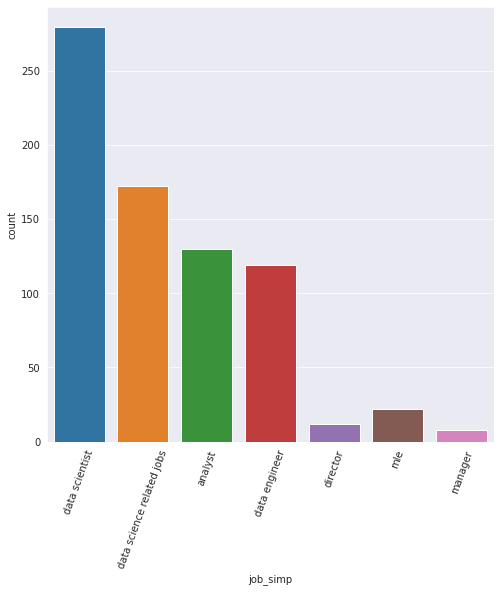

In [148]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.countplot(df.job_simp);
plt.xticks(rotation=70);

In [149]:
df['seniority']=  df.job_title.apply(seniority)
df.seniority.value_counts()

Not Specified    417
Senior           261
Mid               35
Junior            29
Name: seniority, dtype: int64

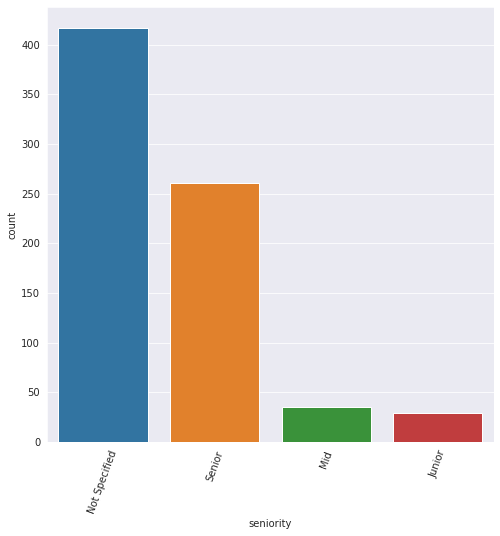

In [150]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.countplot(df.seniority);
plt.xticks(rotation=70);

### Cleaning of `Job_State` column 

In [154]:
df[df.job_state == 'Los Angeles']

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel


In [155]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

### Cleaning of `Competitors` Column 

In [211]:
df.competitors.head(10)

0                                                   -1
1                                                   -1
2                                                   -1
3    Oak Ridge National Laboratory, National Renewa...
4                 Commerce Signals, Cardlytics, Yodlee
5                    Digital Realty, CoreSite, Equinix
6                                                   -1
7                                                   -1
8                                                   -1
9                            Clicktripz, SmarterTravel
Name: competitors, dtype: object

In [212]:
df['num_comp'] = df.competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp.value_counts()

0    411
3    216
2     39
1     12
4      1
Name: num_comp, dtype: int64

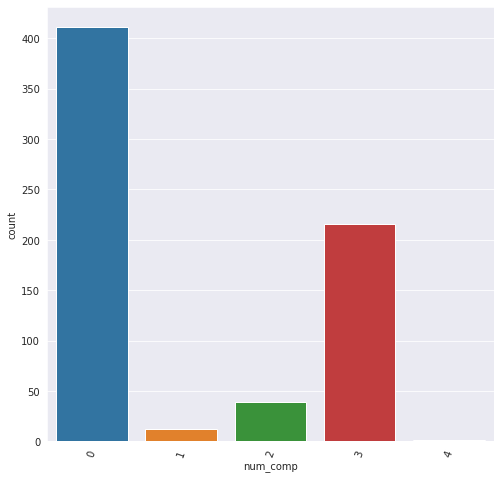

In [213]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.countplot(df.num_comp);
plt.xticks(rotation=70);

In [218]:
df = df.drop('competitors', axis=1)
df

,job_title,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,...,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel,Salary
0,Data Scientist,data scientist location albuquerque nm educati...,3.8,Tecolote Research,Goleta,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,Tecolote Research,NM,0,50,1,0,0,0,1,72000.0
1,Healthcare Data Scientist,general summary healthcare data scientist posi...,3.4,University of Maryland Medical System,Baltimore,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,University of Maryland Medical System,MD,0,39,1,0,0,0,0,87500.0
2,Data Scientist,knowbe4 inc high growth information security c...,4.8,KnowBe4,Clearwater,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,KnowBe4,FL,1,13,1,0,1,0,1,85000.0
3,Data Scientist,organization job id job id 310709 directorate ...,3.8,PNNL,Richland,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,PNNL,WA,1,58,1,0,0,0,0,76500.0
4,Data Scientist,data scientist affinity solutions marketing cl...,2.9,Affinity Solutions,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,Affinity Solutions,NY,1,25,1,0,0,0,1,114500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",site name usa massachusetts cambridge posted d...,3.9,GSK,Brentford,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),...,GSK,MA,0,193,0,0,0,1,0,84500.0
951,Senior Data Engineer,challenge eventbrite worldclass data repositor...,4.4,Eventbrite,San Francisco,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),...,Eventbrite,TN,0,17,1,0,1,1,0,102500.0
952,"Project Scientist - Auton Lab, Robotics Institute",auton lab carnegie mellon university large aca...,2.6,Software Engineering Institute,Pittsburgh,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,...,Software Engineering Institute,PA,1,39,0,0,0,0,1,73500.0
953,Data Science Manager,data science managerresponsibilities oversee t...,3.2,"Numeric, LLC",Chadds Ford,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),...,"Numeric, LLC",PA,0,-1,0,0,0,0,1,127500.0


### Cleaning of `Company_txt` column

In [157]:
# df.columns
df.company_text

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
950                                      GSK
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
955             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [158]:
df['company_text'] = df.company_text.apply(lambda x: x.replace('\n', ''))
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,39,1,0,0,0,0


### Cleaning of `Company_Name` column

In [161]:
df.company_name =  df.company_name.apply(lambda x : x.split("\n")[0])
df.head(2)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,39,1,0,0,0,0


In [162]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'job_simp', 'seniority', 'num_comp', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python', 'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [163]:
df['Salary'] = (df.min_salary+df.max_salary)*1000/2
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel,Salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research,NM,0,50,1,0,0,0,1,72000.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System,MD,0,39,1,0,0,0,0,87500.0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4,FL,1,13,1,0,1,0,1,85000.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL,WA,1,58,1,0,0,0,0,76500.0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions,NY,1,25,1,0,0,0,1,114500.0


#### Droping of un-necessary columns

In [182]:
df = df.drop(['salary_estimate', 'min_salary', 'max_salary', 'founded', 'location'],1)


In [172]:
df = df.drop(['founded', 'location'],1)


In [173]:
df.columns

Index(['job_title', 'job_description', 'rating', 'company_name',
       'headquarters', 'size', 'type_of_ownership', 'industry', 'sector',
       'revenue', 'competitors', 'job_simp', 'seniority', 'num_comp', 'hourly',
       'employer_provided', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python', 'r_studio', 'spark', 'aws', 'excel',
       'Salary'],
      dtype='object')

In [232]:
df = df.drop(['hourly','employer_provided','avg_salary'],1)

#### Removal of Outliers

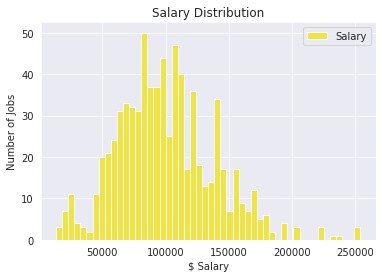

In [175]:
x = list(df.Salary)

colors = ['#F0E442']
names = ['Salary']
         
plt.hist([x], bins = 50,
         color = colors, label=names)

plt.legend()
plt.xlabel('$ Salary')
plt.ylabel('Number of Jobs')
plt.title('Salary Distribution');


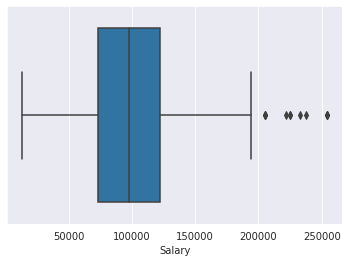

In [177]:
sns.boxplot(df.Salary);

In [178]:
# Remove outliers
df = df[50000 <= df['Salary']]
df = df[df['Salary'] < 200000]


#### Cleaning of Job Description Column

In [199]:
import re
stopWords = stopwords.words('english')

def processing(df):
    # Lowering and removing punctuation
    df['job_description'] = df['job_description'].apply(lambda x: ' '.join(x.split()))
    df['job_description'] = df['job_description'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
    df['job_description'] = df['job_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))                                            
    return(df)

df = processing(df)

In [201]:
# df.columns

#### Cleaning of `headquarters` column

In [204]:
df.headquarters = df.headquarters.apply(lambda x: x.split(",")[0])
df.head(2)

,job_title,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,...,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel,Salary
0,Data Scientist,data scientist location albuquerque nm educati...,3.8,Tecolote Research,Goleta,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,Tecolote Research,NM,0,50,1,0,0,0,1,72000.0
1,Healthcare Data Scientist,general summary healthcare data scientist posi...,3.4,University of Maryland Medical System,Baltimore,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,University of Maryland Medical System,MD,0,39,1,0,0,0,0,87500.0


## Exploratory Data Analysis

In [245]:
import pandas_profiling

In [246]:
pandas_profiling.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Save the cleaned data 

In [184]:
df.to_csv('dataset/salary_data_cleaned.csv', index=False)

## Feature Engineering

In [183]:
class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [205]:
# df

In [188]:
df.columns

Index(['job_title', 'job_description', 'rating', 'company_name',
       'headquarters', 'size', 'type_of_ownership', 'industry', 'sector',
       'revenue', 'competitors', 'job_simp', 'seniority', 'num_comp', 'hourly',
       'employer_provided', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python', 'r_studio', 'spark', 'aws', 'excel',
       'Salary'],
      dtype='object')

In [219]:
df.select_dtypes(exclude=np.number).columns

Index(['job_title', 'job_description', 'company_name', 'headquarters', 'size',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'job_simp',
       'seniority', 'company_text', 'job_state'],
      dtype='object')

In [233]:
# Define features & target, also perform train_test split
features= [c for c in df.columns.values if c not in ['Salary']]
numeric_features= [c for c in df.columns.values if c not in ['job_title', 'job_description', 'company_name', 'headquarters', 'size',
       'type_of_ownership', 'industry', 'sector', 'revenue',
       'job_simp', 'seniority', 'company_text', 'job_state']]
target = 'Salary'


In [225]:

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train.head()

,job_title,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,...,avg_salary,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel
599,"Principal Scientist, Hematology",summary principal scientist report director sc...,3.3,Rochester Regional Health,Rochester,10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),...,84.5,Rochester Regional Health,NY,1,9,0,0,0,0,0
334,Data Engineer I - Azure,youre likely find another company like vermeer...,3.9,Vermeer,Pella,1001 to 5000 employees,Company - Private,Industrial Manufacturing,Manufacturing,$1 to $2 billion (USD),...,77.5,Vermeer,IA,1,75,0,0,0,0,1
292,Senior Data Analyst,role senior specialist data analysis aka data ...,2.9,National Student Clearinghouse,Herndon,201 to 500 employees,Nonprofit Organization,Colleges & Universities,Education,$25 to $50 million (USD),...,61.5,National Student Clearinghouse,VA,1,30,1,0,0,0,1
18,Data Scientist - Health Data Analytics,nuna mission make highquality healthcare affor...,4.2,Nuna,San Francisco,51 to 200 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,...,142.5,Nuna,CA,1,13,0,0,0,0,0
326,Insurance Financial Data Analyst,description clearwater analytics global saas s...,4.2,Clearwater Analytics,Boise,501 to 1000 employees,Company - Private,Investment Banking & Asset Management,Finance,$50 to $100 million (USD),...,63.5,Clearwater Analytics,ID,1,19,0,0,0,0,1


### Pipeline for each feature

In [229]:
# Define text feature pipelines
Job_Title = Pipeline([
                ('selector', TextSelector(key='job_title')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Job_Desc = Pipeline([
                ('selector', TextSelector(key='job_description')),
                ('tfidf', TfidfVectorizer(stop_words='english',ngram_range=(1,2), max_features=1000))
            ])

Company = Pipeline([
                ('selector', TextSelector(key='company_name')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Size = Pipeline([
                ('selector', TextSelector(key='size')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Ownership = Pipeline([
                ('selector', TextSelector(key='type_of_ownership')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Industry = Pipeline([
                ('selector', TextSelector(key='industry')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Sector = Pipeline([
                ('selector', TextSelector(key='sector')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Revenue = Pipeline([
                ('selector', TextSelector(key='revenue')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

City = Pipeline([
                ('selector', TextSelector(key='city')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

State = Pipeline([
                ('selector', TextSelector(key='job_state')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])

Job_Simp = Pipeline([
                ('selector', TextSelector(key='job_simp')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])



Company_Text = Pipeline([
                ('selector', TextSelector(key='company_text')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])



Seniority = Pipeline([
                ('selector', TextSelector(key='seniority')),
                ('tfidf', TfidfVectorizer(stop_words='english'))
            ])


In [227]:
# len(df.select_dtypes(exclude=np.number).columns)

In [228]:
df.head()

,job_title,job_description,rating,company_name,headquarters,size,type_of_ownership,industry,sector,revenue,...,company_text,job_state,same_state,age,python,r_studio,spark,aws,excel,Salary
0,Data Scientist,data scientist location albuquerque nm educati...,3.8,Tecolote Research,Goleta,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),...,Tecolote Research,NM,0,50,1,0,0,0,1,72000.0
1,Healthcare Data Scientist,general summary healthcare data scientist posi...,3.4,University of Maryland Medical System,Baltimore,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),...,University of Maryland Medical System,MD,0,39,1,0,0,0,0,87500.0
2,Data Scientist,knowbe4 inc high growth information security c...,4.8,KnowBe4,Clearwater,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),...,KnowBe4,FL,1,13,1,0,1,0,1,85000.0
3,Data Scientist,organization job id job id 310709 directorate ...,3.8,PNNL,Richland,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),...,PNNL,WA,1,58,1,0,0,0,0,76500.0
4,Data Scientist,data scientist affinity solutions marketing cl...,2.9,Affinity Solutions,New York,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,Affinity Solutions,NY,1,25,1,0,0,0,1,114500.0


In [234]:
numeric_features

['rating',
 'num_comp',
 'same_state',
 'age',
 'python',
 'r_studio',
 'spark',
 'aws',
 'excel',
 'Salary']

In [235]:
# Define numeric feature pipelines 
Rating =  Pipeline([
                ('selector', NumberSelector(key='rating')),
                ('standard', StandardScaler())
            ])
Age =  Pipeline([
                ('selector', NumberSelector(key='age')),
                ('standard', StandardScaler())
            ])
Python =  Pipeline([
                ('selector', NumberSelector(key='python')),
                ('standard', StandardScaler())
            ])
R =  Pipeline([
                ('selector', NumberSelector(key='r_studio')),
                ('standard', StandardScaler()),
            ])
Num_Comp =  Pipeline([
                ('selector', NumberSelector(key='num_comp')),
                ('standard', StandardScaler()),
            ])
Same_State =  Pipeline([
                ('selector', NumberSelector(key='same_state')),
                ('standard', StandardScaler()),
            ])
Excel =  Pipeline([
                ('selector', NumberSelector(key='excel')),
                ('standard', StandardScaler()),
            ])
AWS =  Pipeline([
                ('selector', NumberSelector(key='aws')),
                ('standard', StandardScaler()),
            ])
Spark =  Pipeline([
                ('selector', NumberSelector(key='spark')),
                ('standard', StandardScaler()),
            ])


In [236]:
df.columns

Index(['job_title', 'job_description', 'rating', 'company_name',
       'headquarters', 'size', 'type_of_ownership', 'industry', 'sector',
       'revenue', 'job_simp', 'seniority', 'num_comp', 'company_text',
       'job_state', 'same_state', 'age', 'python', 'r_studio', 'spark', 'aws',
       'excel', 'Salary'],
      dtype='object')

In [ ]:
# FeatureUnion for all feature vectors 
feats = FeatureUnion([('Job Title', job_title), 
                      ('Job Description', Job_Desc),
                      ('Company Name', Company),
                      ('Size', Size),
                      ('Type of ownership', Ownership),
                      ('Industry', Industry),
                      ('Sector', Sector),
                      ('Revenue', Revenue),
                      ('City', City),
                      ('State', State),
                      ('Job', Job),
                      ('Rating', Rating),
                      ('Age', Age),
                      ('Python', Python),
                      ('R', R),
                      ('SQL', SQL),
                      ('AWS', AWS),
                      ('Excel', Excel),
                      ('GCP', GCP),
                      ('Azure', Azure),
                      ('Spark', Spark),
                      ('PyTorch', PyTorch),
                      ('TensorFlow', TensorFlow),
                      ('Tableau', Tableau),
                      ('Keras', Keras)
                     ])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)